### STEP FUNCTION (PART 2)
with Lax-Friedrichs


The idea is to compare a method a second order with a one of first order with a step function


In [17]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points (J)
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step we will come back to this 
t_final = 20.0 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt) #how many iteration


# Define the initial condition IN THIS CASE A STEP FUNCTION
u_initial=np.where((x<6) & (x>4),1,0)


# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [18]:
import matplotlib.pyplot as plt
import os

os.makedirs('./2LaxFriedrichs', exist_ok=True)

os.listdir('./');

In [19]:
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./2LaxFriedrichs/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final: #UNTIL THE FINAL TIME 
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./2LaxFriedrichs/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

np.save('./2LaxFriedrichs/l2norm'+str(cf)+'.npy', np.array(l2norm)) 
np.save('./2LaxFriedrichs/time'+str(cf)+'.npy', np.array(time))

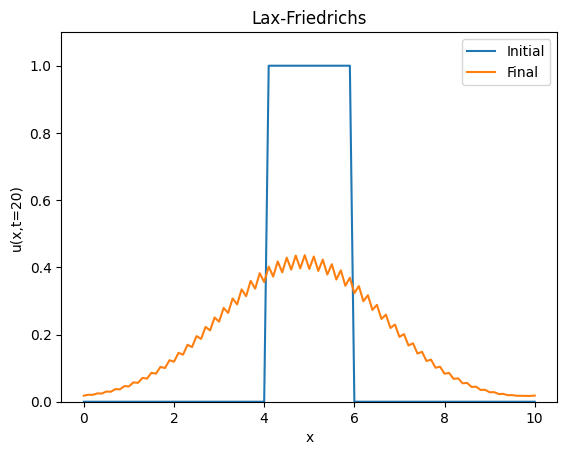

In [23]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Lax-Friedrichs')
plt.ylim(0,1.1)
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t=20)')
plt.savefig('./2LaxFriedrichs/final'+str(cf)+'.png', dpi=200)
plt.show()

In [21]:
# set the directory where your images are stored
directory = "./2LaxFriedrichs/"

# get the list of image files in the directory
files = os.listdir(directory)

# sort the files in alphanumeric order
files=sorted(files)

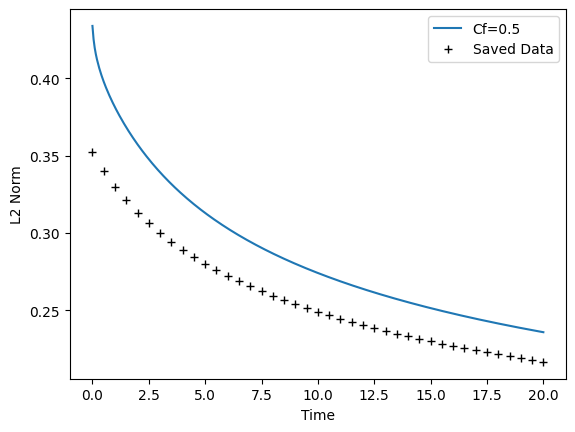

In [22]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
# norm1=np.load('./2LaxFriedrichs/l2norm0.3.npy')
# time1=np.load('./2LaxFriedrichs/time0.3.npy')
norm2=np.load('./2LaxFriedrichs/l2norm0.5.npy')
time2=np.load('./2LaxFriedrichs/time0.5.npy')
# norm3=np.load('./2LaxFriedrichs/l2norm0.8.npy')
# time3=np.load('./2LaxFriedrichs/time0.8.npy')

#plt.plot(time1,norm1, label='Cf=0.3')
plt.plot(time2,norm2, label='Cf=0.5')
# plt.plot(time3,norm3, label='Cf=0.8')


plt.plot(l2_saved[:,0], l2_saved[:,1], '+',color='black', label='Saved Data')
plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.legend()
plt.savefig('./2LaxFriedrichs/norms'+str(cf)+'.png', dpi=200)
plt.show()